In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
raw_data = pd.read_csv(r"C:\Users\User\Downloads\archive\heart_cleveland_upload.csv")

In [3]:
print(raw_data.shape)
raw_data.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


 At first glance, all our 14 properties are numeric. 
 But according to features descriptions, some of them are categorial with numeric code in table.
 
 So, we can easily find them: sex (m/f), cp(chest pain type), fbs (fasting blood sugar),
 restechg (resting electrocardiographic results), exang(exercise induced angina) and others

In [5]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


So, what can we extract from descriptive statistics? Some features are unbalanced.
First, i will consider categorial features


In [9]:
categorials = raw_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'condition']]
categorials.tail()

,sex,cp,fbs,restecg,exang,ca,thal,condition
292,1,3,0,0,0,0,2,1
293,1,3,0,0,0,0,2,1
294,1,3,0,0,1,0,2,1
295,0,3,0,0,0,0,0,0
296,1,3,0,2,1,0,2,1


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>]],
      dtype=object)

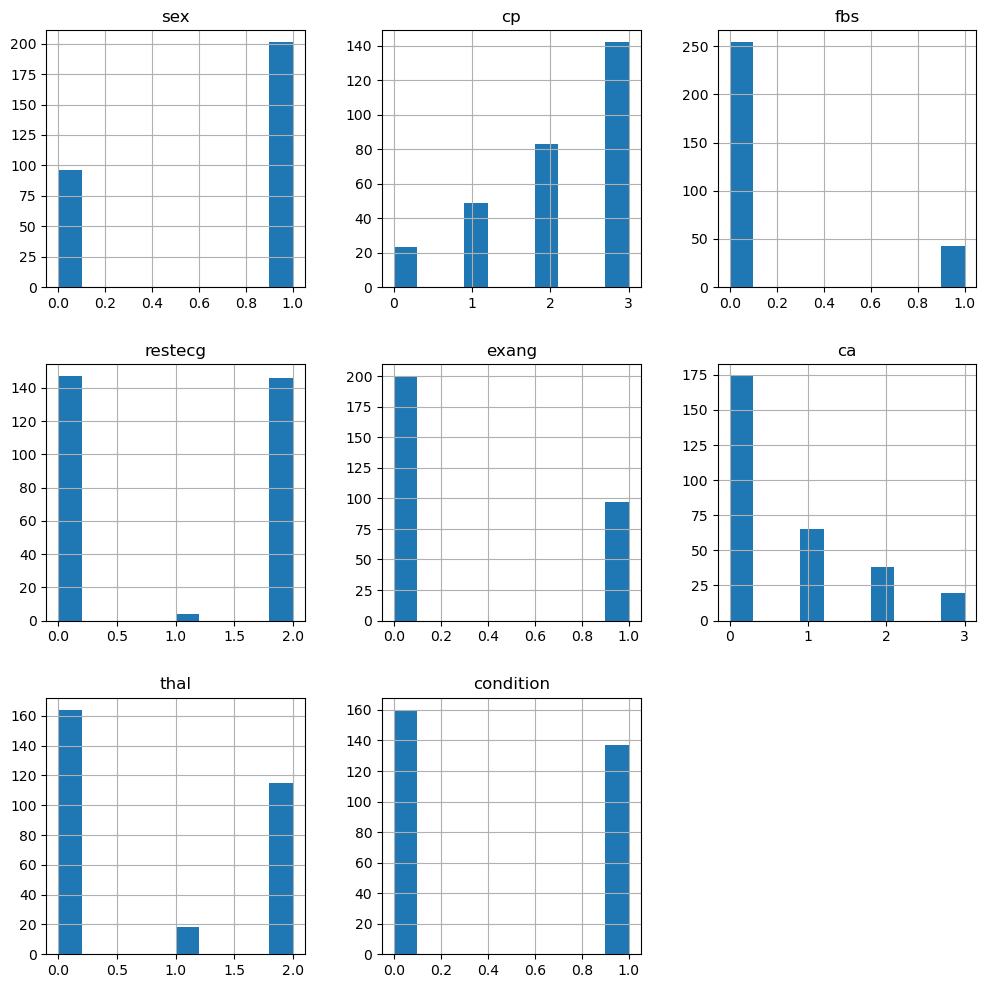

In [12]:
categorials.hist(figsize = (12, 12))

So, non uniform distibution has been rendered

Now we have to check numerical features. We expect them to be uniform because of their source

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>]], dtype=object)

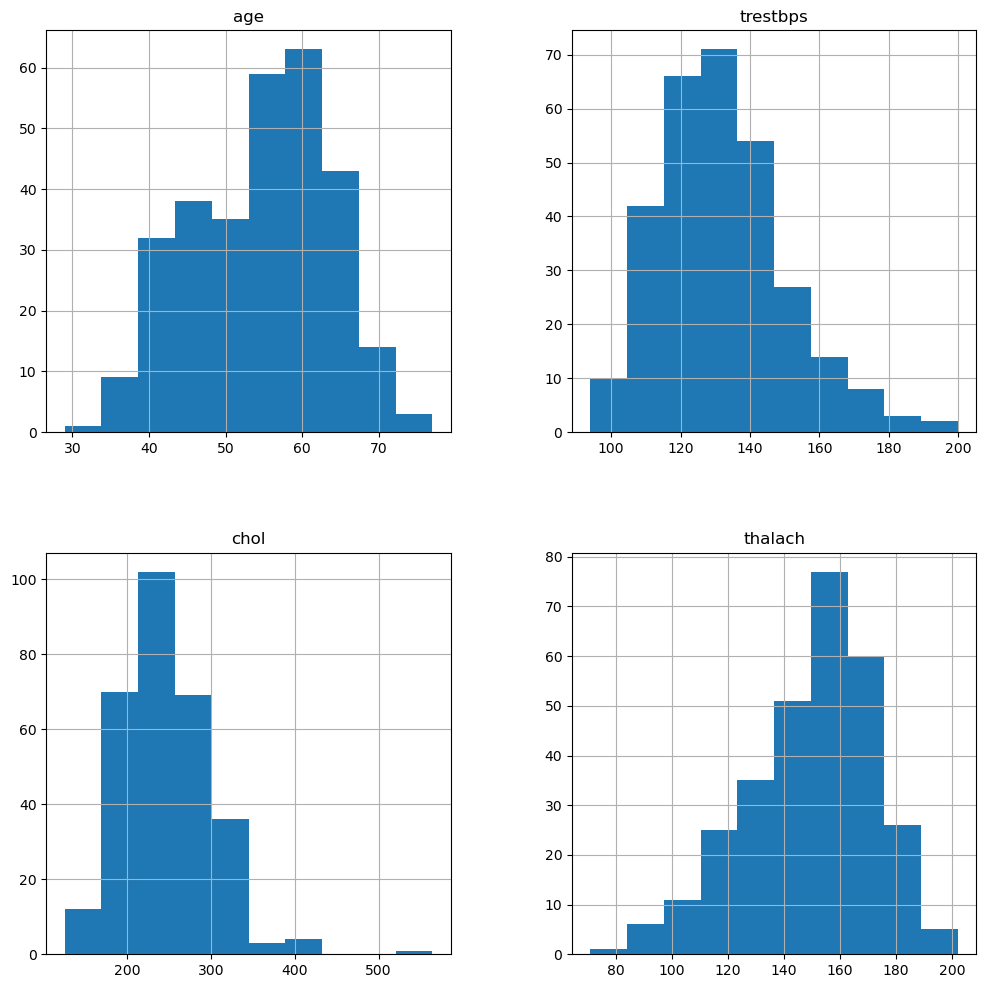

In [18]:
num_cols = ['age', 'trestbps', 'chol', 'thalach']
numerical = raw_data[num_cols]
numerical.hist(figsize = (12, 12))

How many data values were misssed?

In [16]:
raw_data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Finally, as an additional check on the quality of the numerical data, let's look at the outliers

We can render them by using boxplots

<AxesSubplot:>

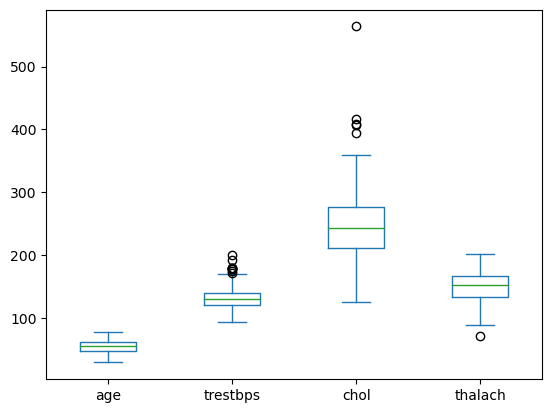

In [23]:
numerical.plot.box()

We need to pay attention to chol (serum cholestoral in mg/dl); 

Are there any correlations between our features?

<AxesSubplot:>

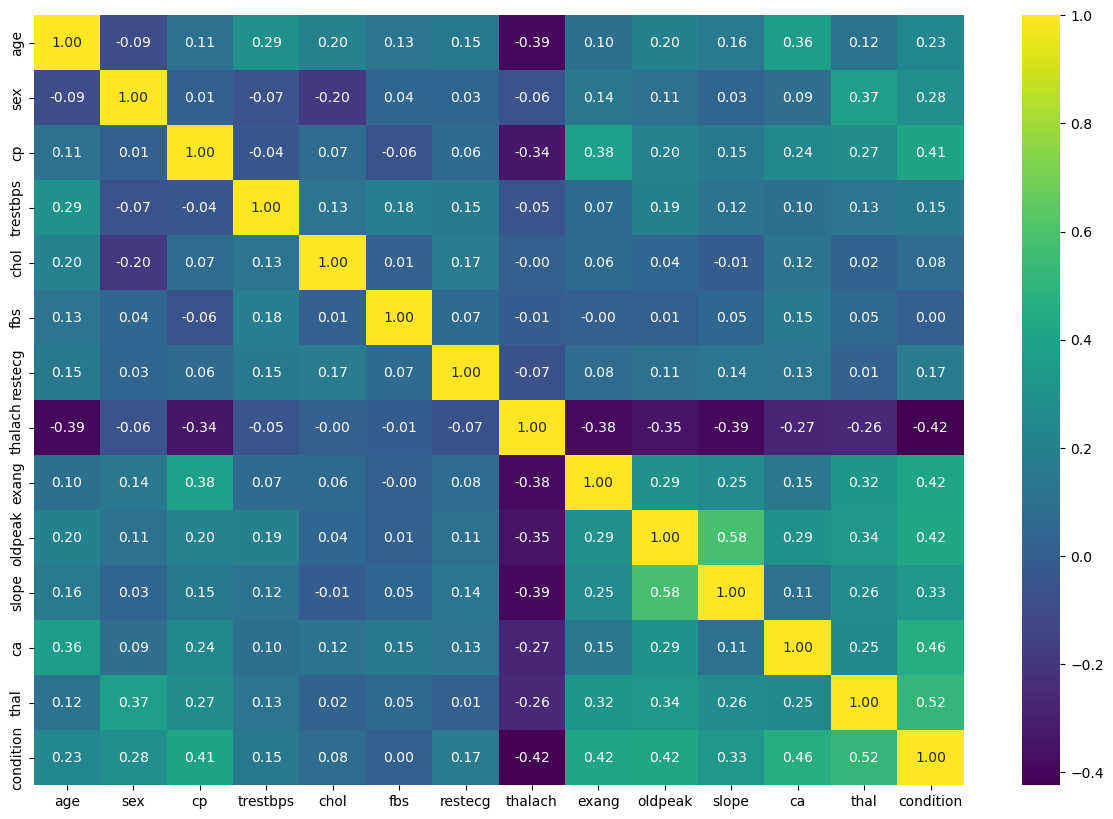

In [25]:
plt.figure(figsize = (15, 10))
sns.heatmap(raw_data.corr(), annot=True, fmt='.2f', cmap='viridis', cbar=True)

ok, We may have to exclude "thalach" feature from the design matrix in order to get the correct weights and gradients.

In [26]:
# pandas_profiling.ProfileReport(raw_data)